In [1]:
import gensim
from gensim import matutils
import numpy as np
from numpy import dot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load Google News word2vec model
google_model = gensim.models.KeyedVectors.load_word2vec_format('../models/google-vectors.w2v'
                                                           ,binary=True)

In [3]:
# what do we know about this model?
vocab_size, dim = google_model.vectors.shape
print("vocab:", vocab_size)
print("depth:", dim)

vocab: 71291
depth: 200


In [4]:
google_model.most_similar(positive=["beautiful","cute","tasteful","attractive"],
                          negative=["antlers","vile"],topn=50)

[('elegant', 0.41475939750671387),
 ('sophisticated', 0.40200722217559814),
 ('simple', 0.3852735757827759),
 ('colorful', 0.3845011591911316),
 ('easy', 0.3713599443435669),
 ('useful', 0.36049696803092957),
 ('straightforward', 0.35785937309265137),
 ('picturesque', 0.34645792841911316),
 ('desirable', 0.3454432487487793),
 ('voluptuous', 0.344418466091156),
 ('powerful', 0.34372377395629883),
 ('complex', 0.34331515431404114),
 ('excellent', 0.3422892689704895),
 ('realistic', 0.3405711054801941),
 ('flexible', 0.33964967727661133),
 ('versatile', 0.33854496479034424),
 ('unusual', 0.33684778213500977),
 ('martensite', 0.3364638090133667),
 ('pleasing', 0.3352185785770416),
 ('expensive', 0.33421146869659424),
 ('simplicity', 0.33405840396881104),
 ('durable', 0.3327968716621399),
 ('caters', 0.33095023036003113),
 ('cheap', 0.3286696970462799),
 ('sluggish', 0.3278927505016327),
 ('plies', 0.32617151737213135),
 ('enjoyable', 0.3239082992076874),
 ('inexpensive', 0.3238640129566192

In [5]:
# extract sample set of terms
words = google_model.index2word[:200]
data = google_model.vectors[:200]

# add words of interest
aesthetic_terms = ["beautiful","cute","tasteful","attractive"]
for t in aesthetic_terms:
    words.append(t)
    data = np.vstack((data,google_model[t]))

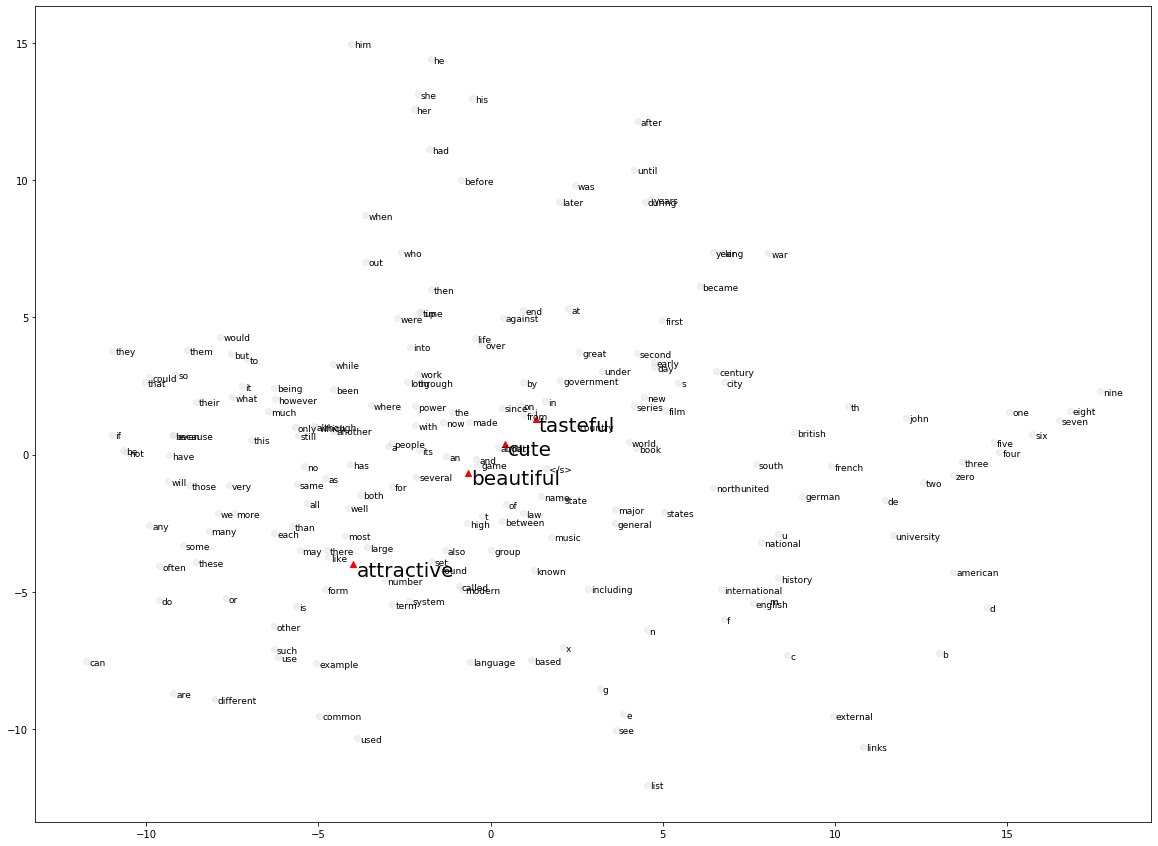

In [6]:
pca = PCA(n_components=2)
plot_data = pca.fit_transform(data)

lat = len(aesthetic_terms)

# "regular" words
xs = plot_data[:(len(plot_data) - lat), 0]
ys = plot_data[:(len(plot_data) - lat), 1]

# aesthetic words
axs = plot_data[-lat:, 0]
ays = plot_data[-lat:, 0]

fig = plt.figure(figsize=(20, 15))
plt.clf()

# regular words
plt.scatter(xs, ys, marker = 'o', c="lightgrey",alpha=0.3)

# aesthetic terms
plt.scatter(axs, ays, marker = '^', c="red")

for i, w in enumerate(words[:(len(plot_data) - lat)]):
    plt.annotate(w, xy = (xs[i], ys[i]), xytext = (3, 3),size=9,
                 textcoords = 'offset points', ha = 'left', va = 'top')
    
for i, w in enumerate(words[-lat:]):
    plt.annotate(w, xy = (axs[i], ays[i]), xytext = (3, 3),size=20,
                 textcoords = 'offset points', ha = 'left', va = 'top')